# 1 Introdução

Neste notebook, vamos explorar técnicas de criação de features derivadas, especificamente feature crossing e feature transformation. Estas técnicas são fundamentais para melhorar o desempenho dos modelos de Machine Learning.

# 2 Importação de Bibliotecas

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 3 Carregamento do Dataset

## 3.1 Descrição do Dataset

Para este exemplo, utilizaremos o famoso dataset "Titanic" disponível no Kaggle. Este dataset contém informações detalhadas sobre os passageiros do RMS Titanic, que afundou em 1912 após colidir com um iceberg. É amplamente utilizado em competições e estudos de machine learning devido à sua riqueza de variáveis e à natureza desafiadora da predição de sobrevivência.

- Principais Características do Dataset:
    - PassengerId: Identificador único para cada passageiro.
    - Survived: Indicador de sobrevivência (0 = Não, 1 = Sim).
    - Pclass: Classe do passageiro (1 = Primeira, 2 = Segunda, 3 = Terceira).
    - Name: Nome do passageiro.
    - Sex: Sexo do passageiro.
    - Age: Idade do passageiro.
    - SibSp: Número de irmãos/cônjuges a bordo.
    - Parch: Número de pais/filhos a bordo.
    - Ticket: Número do bilhete.
    - Fare: Tarifa paga pelo bilhete.
    - Cabin: Número da cabine.
    - Embarked: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

- Importância das Variáveis:
    - Classe do Passageiro (Pclass): Indica o nível socioeconômico do passageiro. Passageiros de primeira classe tinham maior probabilidade de sobrevivência.
    - Sexo (Sex): As mulheres tinham uma taxa de sobrevivência significativamente maior do que os homens.
    - Idade (Age): Crianças também tinham uma maior taxa de sobrevivência. A idade ajuda a identificar esses grupos.
    - Número de Irmãos/Cônjuges e Pais/Filhos a Bordo (SibSp e Parch): Essas variáveis ajudam a entender a estrutura familiar a bordo e como ela impactava as chances de sobrevivência.
    - Tarifa (Fare): A tarifa paga pode refletir o status socioeconômico.
    - Porto de Embarque (Embarked): Pode dar insights sobre a origem dos passageiros e possíveis padrões de embarque.

- Fonte do Dataset
    - O dataset está originalmente disponível em: Wine Quality Data Set no UCI Machine Learning Repository
    - Para carregar o dataset em um DataFrame do pandas:

        import pandas as pd

        url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

        df = pd.read_csv(url, delimiter=';')

## 3.2 Carregamento do Dataset

In [101]:
df = pd.read_csv("datasets/titanic.csv")

# Mostrando as primeiras linhas do dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3 Análise Exploratória

In [102]:
# Visualizando informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
# Visualizando estatísticas descritivas
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 4 Lidando com dados faltantes

In [104]:
# Removendo colunas desnecessárias e linhas com valores nulos
df_clean = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId']).dropna()

In [105]:
df_clean.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712,712.000000,712.000000,712.000000,712.000000,712
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,554
mean,0.404494,2.240169,NaN,29.642093,0.514045,0.432584,34.567251,NaN
std,0.491139,0.836854,NaN,14.492933,0.930692,0.854181,52.938648,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,1.000000,NaN,20.000000,0.000000,0.000000,8.050000,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.645850,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.000000,NaN


# 5 Feature Crossing

O feature crossing envolve criar novas features combinando duas ou mais variáveis existentes.

## 5.1 Criação de uma nova feature combinando 'Pclass' e 'Sex' e 'Pclass' e 'Embarked'

In [106]:
# Criando uma cópia do dataset antigo
df_clean_fc = df_clean.copy()

# Criar uma nova característica combinando 'Pclass' e 'Sex'
df_clean_fc['Pclass_Sex'] = df_clean['Pclass'].astype(str) + '_' + df_clean['Sex']

# Criar uma nova característica combinando 'Pclass' e 'Embarked'
df_clean_fc['Pclass_Embarked'] = df_clean_fc['Pclass'].astype(str) + '_' + df_clean_fc['Embarked']

## 5.2 Exibição das novas features

In [107]:
df_clean_fc.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_Sex,Pclass_Embarked
0,0,3,male,22.0,1,0,7.2500,S,3_male,3_S
1,1,1,female,38.0,1,0,71.2833,C,1_female,1_C
2,1,3,female,26.0,0,0,7.9250,S,3_female,3_S
3,1,1,female,35.0,1,0,53.1000,S,1_female,1_S
4,0,3,male,35.0,0,0,8.0500,S,3_male,3_S


# 6 Feature Transformation

A feature transformation envolve aplicar funções matemáticas às variáveis para criar novas features.

## 6.1 Criação de uma feature de interação usando PolynomialFeatures

In [108]:
poly = PolynomialFeatures(degree=2, include_bias=False)
features = df_clean_fc[['Age', 'Fare']].fillna(0)  # Preenchendo valores ausentes

# Transformação
transformed_features = poly.fit_transform(features)

# Criação de um DataFrame para as novas features
poly_df = pd.DataFrame(transformed_features, columns=poly.get_feature_names_out(['Age', 'Fare']))

# Concatenar os DataFrames
df_clean_fc_poly = pd.concat([df_clean_fc.reset_index(drop=True), poly_df.reset_index(drop=True)], axis=1)

# Remover colunas duplicadas
df_clean_fc_poly = df_clean_fc_poly.loc[:,~df_clean_fc_poly.columns.duplicated()]

## 6.2 Exibição das novas features transformadas

In [109]:
df_clean_fc_poly

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_Sex,Pclass_Embarked,Age^2,Age Fare,Fare^2
0,0,3,male,22.0,1,0,7.2500,S,3_male,3_S,484.0,159.5000,52.562500
1,1,1,female,38.0,1,0,71.2833,C,1_female,1_C,1444.0,2708.7654,5081.308859
2,1,3,female,26.0,0,0,7.9250,S,3_female,3_S,676.0,206.0500,62.805625
3,1,1,female,35.0,1,0,53.1000,S,1_female,1_S,1225.0,1858.5000,2819.610000
4,0,3,male,35.0,0,0,8.0500,S,3_male,3_S,1225.0,281.7500,64.802500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q,3_female,3_Q,1521.0,1135.8750,848.265625
708,0,2,male,27.0,0,0,13.0000,S,2_male,2_S,729.0,351.0000,169.000000
709,1,1,female,19.0,0,0,30.0000,S,1_female,1_S,361.0,570.0000,900.000000
710,1,1,male,26.0,0,0,30.0000,C,1_male,1_C,676.0,780.0000,900.000000


# 7 Comparativo de ML

Vamos comparar o desempenho de um modelo de Machine Learning usando o dataset bruto e o dataset tratado.

## 7.1 Preparação dos Dados

In [110]:
# 7.1.1 Dados brutos
df_raw = df_clean[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].copy()
df_raw['Sex'] = df_raw['Sex'].map({'male': 0, 'female': 1})
X_raw = df_raw.drop('Survived', axis=1)
y_raw = df_raw['Survived']

# 7.1.2 Dados tratados
df_treated = df_clean_fc_poly.copy()
df_treated['Pclass_Sex'] = df_treated['Pclass_Sex'].astype('category').cat.codes
df_treated['Pclass_Embarked'] = df_treated['Pclass_Embarked'].astype('category').cat.codes
X_treated = df_treated.drop(['Survived','Embarked','Sex','Pclass','Age','Fare'], axis=1)
y_treated = df_treated['Survived']

In [111]:
X_treated

,SibSp,Parch,Pclass_Sex,Pclass_Embarked,Age^2,Age Fare,Fare^2
0,1,0,5,8,484.0,159.5000,52.562500
1,1,0,0,0,1444.0,2708.7654,5081.308859
2,0,0,4,8,676.0,206.0500,62.805625
3,1,0,0,2,1225.0,1858.5000,2819.610000
4,0,0,5,8,1225.0,281.7500,64.802500
...,...,...,...,...,...,...,...
707,0,5,4,7,1521.0,1135.8750,848.265625
708,0,0,3,5,729.0,351.0000,169.000000
709,0,0,0,2,361.0,570.0000,900.000000
710,0,0,1,0,676.0,780.0000,900.000000


## 7.2 Divisão dos dados em treino e teste

In [112]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.3, random_state=42)
X_train_treated, X_test_treated, y_train_treated, y_test_treated = train_test_split(X_treated, y_treated, test_size=0.3, random_state=42)

## 7.3 Treinamento e Avaliação do Modelo

In [113]:
# 7.3.1 Modelo com dados brutos
model_raw = RandomForestClassifier()
model_raw.fit(X_train_raw, y_train_raw)
y_pred_raw = model_raw.predict(X_test_raw)

# 7.3.2 Relatórios de classificação
print("Dados Brutos")
print(classification_report(y_test_raw, y_pred_raw))
print("Confusion Matrix")
print(confusion_matrix(y_test_raw, y_pred_raw))

Dados Brutos
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       122
           1       0.74      0.70      0.72        92

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214

Confusion Matrix
[[100  22]
 [ 28  64]]


In [114]:
# 7.3.3 Modelo com dados tratados
model_treated = RandomForestClassifier()
model_treated.fit(X_train_treated, y_train_treated)
y_pred_treated = model_treated.predict(X_test_treated)

# 7.3.4 Relatórios de classificação
print("\nDados Tratados")
print(classification_report(y_test_treated, y_pred_treated))
print("Confusion Matrix")
print(confusion_matrix(y_test_treated, y_pred_treated))


Dados Tratados
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       122
           1       0.77      0.71      0.74        92

    accuracy                           0.79       214
   macro avg       0.78      0.78      0.78       214
weighted avg       0.78      0.79      0.78       214

Confusion Matrix
[[103  19]
 [ 27  65]]


## 7.4 Gráficos de Confusion Matrix

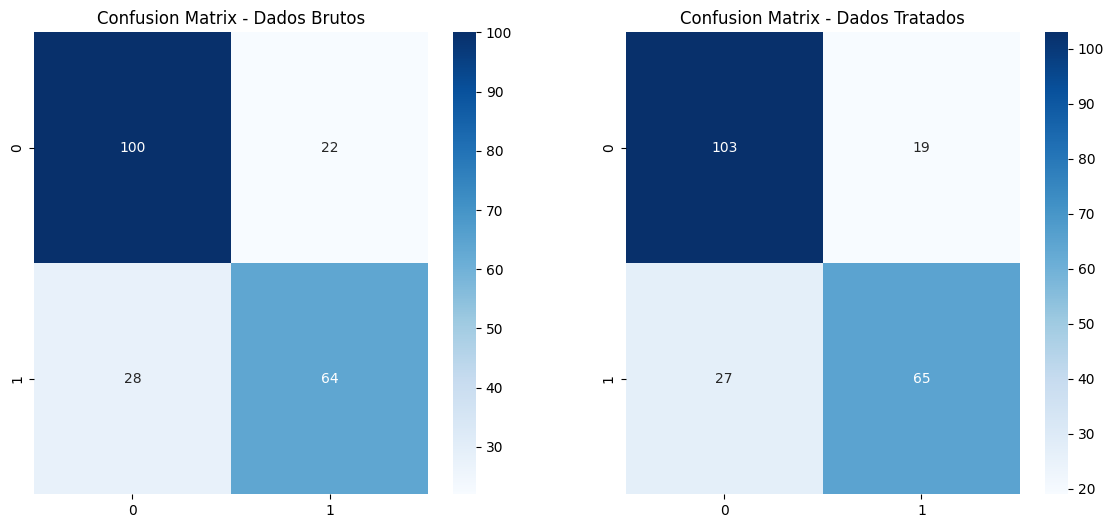

In [115]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(confusion_matrix(y_test_raw, y_pred_raw), annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Confusion Matrix - Dados Brutos')

sns.heatmap(confusion_matrix(y_test_treated, y_pred_treated), annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Confusion Matrix - Dados Tratados')

plt.show()